# Code

In [76]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
output_notebook()
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

Loading BokehJS ...

In [77]:
rawData1=pd.read_csv('archive/basicDrinkingWaterServices.csv')
rawData2=pd.read_csv('archive/lifeExpectancyAtBirth.csv')

In [78]:
rawData1

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56
...,...,...,...,...
3450,Zimbabwe,2004,Population using at least basic drinking-water...,57.94
3451,Zimbabwe,2003,Population using at least basic drinking-water...,58.59
3452,Zimbabwe,2002,Population using at least basic drinking-water...,59.23
3453,Zimbabwe,2001,Population using at least basic drinking-water...,59.88


In [79]:
rawData2

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04
...,...,...,...,...,...
2192,Zimbabwe,2010,Life expectancy at birth (years),Male,49.58
2193,Zimbabwe,2010,Life expectancy at birth (years),Female,53.21
2194,Zimbabwe,2000,Life expectancy at birth (years),Both sexes,46.57
2195,Zimbabwe,2000,Life expectancy at birth (years),Male,45.15


In [80]:
# taking only necessary columns
rawData1=rawData1[["Location", "Period" , "First Tooltip"]]
rawData1

,Location,Period,First Tooltip
0,Afghanistan,2017,57.32
1,Afghanistan,2016,54.84
2,Afghanistan,2015,52.39
3,Afghanistan,2014,49.96
4,Afghanistan,2013,47.56
...,...,...,...
3450,Zimbabwe,2004,57.94
3451,Zimbabwe,2003,58.59
3452,Zimbabwe,2002,59.23
3453,Zimbabwe,2001,59.88


In [81]:
# taking only necessary columns
rawData2=rawData2[["Location", "Period", "Dim1", "First Tooltip"]]
rawData2

,Location,Period,Dim1,First Tooltip
0,Afghanistan,2019,Both sexes,63.21
1,Afghanistan,2019,Male,63.29
2,Afghanistan,2019,Female,63.16
3,Afghanistan,2015,Both sexes,61.65
4,Afghanistan,2015,Male,61.04
...,...,...,...,...
2192,Zimbabwe,2010,Male,49.58
2193,Zimbabwe,2010,Female,53.21
2194,Zimbabwe,2000,Both sexes,46.57
2195,Zimbabwe,2000,Male,45.15


In [82]:
# changing into numpy arrays
data1=np.array(rawData1)
data2=np.array(rawData2)

In [83]:
# taking 2015 data
dw2015=[]
for x in data1:
    if x[1]==2015:
        dw2015.append(x)
dw2015[:5]

[array(['Afghanistan', 2015, 52.39], dtype=object),
 array(['Albania', 2015, 89.88], dtype=object),
 array(['Algeria', 2015, 88.69], dtype=object),
 array(['Andorra', 2015, 100.0], dtype=object),
 array(['Angola', 2015, 26.71], dtype=object)]

In [84]:
# taking 2015 data
le2015=[]
for x in data2:
    if (x[1]==2015) and (x[2]=='Both sexes'):
        le2015.append(x)
le2015[:5]

[array(['Afghanistan', 2015, 'Both sexes', 61.65], dtype=object),
 array(['Albania', 2015, 'Both sexes', 77.84], dtype=object),
 array(['Algeria', 2015, 'Both sexes', 76.54], dtype=object),
 array(['Angola', 2015, 'Both sexes', 61.72], dtype=object),
 array(['Antigua and Barbuda', 2015, 'Both sexes', 76.14], dtype=object)]

In [85]:
# changing into numpy arrays
DW2015=np.array(dw2015)
lifeExpectancy2015=np.array(le2015)

In [86]:
DW2015.shape

(193, 3)

In [87]:
lifeExpectancy2015.shape

(183, 4)

In [88]:
# using only countries in both lists
drinkingWater2015=[]
for x in DW2015:
    if x[0] in lifeExpectancy2015:
        drinkingWater2015.append(x)
drinkingWater2015=np.array(drinkingWater2015)

In [89]:
drinkingWater2015.shape

(183, 3)

In [90]:
lifeExpectancy2015.shape

(183, 4)

In [91]:
# assigning x-variable
x2015=drinkingWater2015[:,2]
x2015=x2015.astype('float64')
x2015

array([ 52.39,  89.88,  88.69,  26.71,  96.74,  92.98,  99.6 , 100.  ,
       100.  ,  79.28,  98.89, 100.  ,  96.43,  98.47,  95.94, 100.  ,
        95.65,  57.87,  96.13,  75.41,  94.85,  71.89,  87.  ,  99.9 ,
        98.24,  37.09,  55.56,  72.87,  69.86,  39.05,  98.77,  33.75,
        29.77,  98.16,  84.21,  84.64,  76.91,  41.39,  98.8 ,  57.58,
        99.57,  89.67,  99.55,  99.82,  91.62,  22.34, 100.  ,  47.96,
        89.36,  81.88,  98.57,  89.25,  30.78,  27.8 ,  99.19,  59.37,
        29.11,  88.84, 100.  , 100.  ,  55.05,  63.37,  95.26, 100.  ,
        66.04, 100.  ,  95.63,  88.97,  49.72,  52.76, 100.  ,  42.42,
        87.31, 100.  , 100.  ,  88.9 ,  80.16,  89.01,  86.56,  96.99,
       100.  ,  99.38,  84.4 ,  98.93,  97.78,  89.76,  48.18,  69.08,
       100.  ,  81.39,  71.11,  97.88,  92.26,  59.79,  60.81,  97.64,
        90.72, 100.  ,  34.78,  63.31,  89.93,  98.25,  64.59, 100.  ,
        46.69,  99.83,  94.26,  78.57,  52.86,  95.91,  67.69,  35.54,
      

In [92]:
# assigning y-variable
y2015=lifeExpectancy2015[:,3]
y2015=y2015.astype('float64')
y2015

array([61.65, 77.84, 76.54, 61.72, 76.14, 76.17, 74.51, 82.28, 80.98,
       70.67, 72.92, 76.46, 73.58, 76.22, 73.82, 80.71, 74.05, 61.96,
       72.15, 71.52, 76.32, 60.93, 75.13, 74.4 , 74.55, 60.92, 62.05,
       74.88, 69.17, 59.11, 81.76, 50.53, 57.91, 79.82, 76.64, 78.35,
       66.45, 63.11, 80.78, 60.2 , 77.58, 77.91, 82.01, 78.46, 71.76,
       60.44, 80.59, 64.64, 71.75, 77.18, 70.49, 73.25, 61.13, 62.29,
       77.6 , 54.05, 66.82, 67.83, 81.21, 81.91, 64.93, 64.14, 72.58,
       80.42, 64.55, 80.38, 72.7 , 70.95, 58.81, 58.23, 65.59, 62.61,
       69.82, 75.57, 82.14, 69.31, 70.61, 76.66, 70.29, 81.14, 81.93,
       82.21, 75.85, 83.62, 77.82, 71.91, 64.17, 58.2 , 81.13, 71.59,
       67.08, 74.8 , 75.98, 47.67, 61.17, 74.6 , 74.38, 82.31, 64.19,
       63.04, 74.95, 78.41, 60.89, 81.65, 67.41, 74.14, 75.87, 62.74,
       67.61, 75.27, 72.46, 55.95, 67.58, 62.87, 69.43, 81.28, 81.31,
       74.62, 61.54, 61.16, 82.01, 72.52, 64.18, 78.72, 64.49, 75.56,
       79.08, 70.3 ,

In [93]:
# creating scatterplot
f2015=figure(width=400,height=400,title='Basic Drinking Water vs. Life Expectancy')
f2015.scatter(x=x2015,y=y2015)
f2015.xaxis.axis_label='population with access to drinking water (%)'
f2015.yaxis.axis_label='life expectancy (yrs)'
show(f2015)

In [94]:
# reshaping and adding column of ones
x2015=x2015.reshape(-1,1)
X2015=np.concatenate([x2015,np.ones(shape=(x2015.shape[0],1))],axis=1)
X2015[:5]

array([[52.39,  1.  ],
       [89.88,  1.  ],
       [88.69,  1.  ],
       [26.71,  1.  ],
       [96.74,  1.  ]])

In [95]:
# reshaping into column vector
Y2015=y2015.reshape(-1,1)
Y2015[:5]

array([[61.65],
       [77.84],
       [76.54],
       [61.72],
       [76.14]])

In [96]:
X2015.shape

(183, 2)

In [97]:
Y2015.shape

(183, 1)

In [98]:
# computing M matrix
D2015=X2015.transpose()@X2015
D2015

array([[1.2679497e+06, 1.4676580e+04],
       [1.4676580e+04, 1.8300000e+02]])

In [99]:
# taking inverse
np.linalg.inv(D2015)

array([[ 1.10023601e-05, -8.82388077e-04],
       [-8.82388077e-04,  7.62319082e-02]])

In [100]:
# calculating slope and intercept
M2015=(np.linalg.inv(D2015)@X2015.transpose())@Y2015
M2015

array([[ 0.27859093],
       [49.15736534]])

In [101]:
# calculating predicted values
Yhat2015 = np.dot(np.dot(np.dot(X2015,np.linalg.inv(D2015)),
                         X2015.transpose()),Y2015)

In [102]:
# scatterplot with best fit line
f2015.line(x=x2015.ravel(),y=Yhat2015[:,0],color='black')
show(f2015)

In [103]:
# creating residual plot
def comparison_plot(x,Y, Yhat):
    '''Plots Predicted vs True values for analysis of regression'''
    comparison_plot = figure(title='Difference between Measured and Predicted Values')
    comparison_plot.xaxis.axis_label='x'
    comparison_plot.yaxis.axis_label='Yhat-Y'
    comparison_plot.scatter(x=x,y=Yhat-Y)
    comparison_plot.line(x=[x.min(),x.max()],y=[0,0])
    return comparison_plot
show(comparison_plot(x2015.ravel(),Y2015[:,0], Yhat2015[:,0]))

In [104]:
# calculating R^2
corr_matrix = np.corrcoef(Y2015[:,0], Yhat2015[:,0])
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.6634754097409721


In [105]:
# calculating mean of residuals
residuals=Yhat2015[:,0]-Y2015[:,0]
np.mean(residuals)

-1.2813065726821479e-14

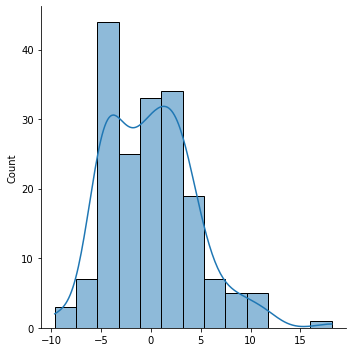

In [106]:
# creating residuals distribution
p = sns.displot(residuals,kde=True)

In [107]:
# looking if there are outliers
df=pd.DataFrame(x2015)
df.describe()

,0
count,183.000000
mean,80.199891
std,22.347111
min,22.340000
25%,64.955000
50%,89.670000
75%,98.600000
max,100.000000


In [108]:
df = pd.DataFrame({'x': x2015[:,0],
                   'y': Y2015[:,0]})
model = ols('x ~ y', data=df).fit()
stud_res = model.outlier_test()

for x in stud_res['student_resid']:
    if x > 3 or x < -3:
        print(x)

-3.1599547051929853
